## 3. Building CNN using Keras tensorflow

https://github.com/anujshah1003/own_data_cnn_implementation_keras

In [1]:
import pandas as pd
import numpy as np
# import os, cv2

from scipy import misc

import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

/home/Jeryl/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from keras import backend as K
K.set_image_dim_ordering('tf')

import h5py

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.preprocessing import image

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Using TensorFlow backend.


Load in pickle files and convert y (labels to one hot encoded matrix)

In [3]:
with open('keras_X_train', 'rb') as file:
    X_train = pickle.load(file)
    
with open('keras_y_train', 'rb') as file:
    y_train = pickle.load(file)
    
with open('keras_X_test', 'rb') as file:
    X_test = pickle.load(file)
    
with open('keras_y_test', 'rb') as file:
    y_test = pickle.load(file)

In [4]:
# convert class labels to on-hot encoding
Y_train = np_utils.to_categorical(y_train, num_classes=17)
del y_train

In [5]:
Y_test = np_utils.to_categorical(y_test, num_classes=17)
del y_test

In [6]:
num_classes = 17

## Defining model architecture
Image shape is 128 by 128 px, 3 channels.  
Model architecture = Convolution > relu > Convolution > relu > Max pool (with drop out) > Convolution > relu > convolution > relu > Max pool (drop out) > fully connected with activation > drop out > softmax activation.  

Model is optimised using Adam (adaptive moment estimation):

- Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models.
- Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.
- Adam is relatively easy to configure where the default configuration parameters do well on most problems.


In [7]:
# Defining the model
input_shape= (128,128,3)

model = Sequential()

model.add(Convolution2D(64, 3,border_mode='same',input_shape=input_shape, dim_ordering="tf"))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Convolution2D(32, 3,border_mode='same',input_shape=input_shape, dim_ordering="tf"))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Convolution2D(32, 3,border_mode='same',input_shape=input_shape, dim_ordering="tf"))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))


model.add(Convolution2D(32, 3,border_mode='same',input_shape=input_shape, dim_ordering="tf"))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

/home/Jeryl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, 3, input_shape=(128, 128,..., padding="same", data_format="channels_last")`
  
/home/Jeryl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, 3, input_shape=(128, 128,..., padding="same", data_format="channels_last")`
  del sys.path[0]
/home/Jeryl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, 3, input_shape=(128, 128,..., padding="same", data_format="channels_last")`
/home/Jeryl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, 3, input_shape=(128, 128,..., padding="same", data_format="channels_last")`


In [8]:
# Viewing model_configuration

model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 64)      36928     
_________________________________________________________________
activation_2 (Activation)    (None, 126, 126, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 63, 63, 32)        18464     
__________

True

## callbacks
Use of callbacks allow you to monitor a metric and save weights of model when training is in progress

In [9]:
# Training with callbacks
from keras import callbacks

filename='model_train_new.csv'
csv_log=callbacks.CSVLogger(filename, separator=',', append=False)

# early_stopping=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='min')

filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [csv_log,checkpoint]

## Training
Training set is trained over 500 epochs, with a batch size of 128

In [10]:
# Training

num_epoch = 210
hist = model.fit(X_train, Y_train, batch_size=128,
                 epochs=num_epoch, 
                 validation_data=(X_test, Y_test),
                 callbacks=callbacks_list)

Train on 12835 samples, validate on 5502 samples
Epoch 1/210
12800/12835 [============================>.] - ETA: 0s - loss: 2.5391 - acc: 0.2001
Epoch 00001: val_loss improved from inf to 2.11749, saving model to Best-weights-my_model-001-2.5391-0.1999.hdf5
12835/12835 [==============================] - 70s 5ms/step - loss: 2.5391 - acc: 0.1999 - val_loss: 2.1175 - val_acc: 0.4553
Epoch 2/210
12800/12835 [============================>.] - ETA: 0s - loss: 1.7061 - acc: 0.4469
Epoch 00002: val_loss improved from 2.11749 to 1.01894, saving model to Best-weights-my_model-002-1.7045-0.4472.hdf5
12835/12835 [==============================] - 64s 5ms/step - loss: 1.7045 - acc: 0.4472 - val_loss: 1.0189 - val_acc: 0.6687
Epoch 3/210
12800/12835 [============================>.] - ETA: 0s - loss: 1.2074 - acc: 0.6028
Epoch 00003: val_loss did not improve
12835/12835 [==============================] - 64s 5ms/step - loss: 1.2068 - acc: 0.6030 - val_loss: 1.0919 - val_acc: 0.6490
Epoch 4/210
12800

Epoch 59/210
12800/12835 [============================>.] - ETA: 0s - loss: 0.0534 - acc: 0.9869
Epoch 00059: val_loss did not improve
12835/12835 [==============================] - 64s 5ms/step - loss: 0.0536 - acc: 0.9868 - val_loss: 0.0425 - val_acc: 0.9904
Epoch 60/210
12800/12835 [============================>.] - ETA: 0s - loss: 0.0453 - acc: 0.9885
Epoch 00060: val_loss did not improve
12835/12835 [==============================] - 64s 5ms/step - loss: 0.0452 - acc: 0.9885 - val_loss: 0.0300 - val_acc: 0.9929
Epoch 61/210
12800/12835 [============================>.] - ETA: 0s - loss: 0.0580 - acc: 0.9875
Epoch 00061: val_loss did not improve
12835/12835 [==============================] - 64s 5ms/step - loss: 0.0579 - acc: 0.9875 - val_loss: 0.0302 - val_acc: 0.9938
Epoch 62/210
12800/12835 [============================>.] - ETA: 0s - loss: 0.0565 - acc: 0.9887
Epoch 00062: val_loss did not improve
12835/12835 [==============================] - 64s 5ms/step - loss: 0.0565 - acc: 

12800/12835 [============================>.] - ETA: 0s - loss: 0.1368 - acc: 0.9866
Epoch 00121: val_loss did not improve
12835/12835 [==============================] - 64s 5ms/step - loss: 0.1364 - acc: 0.9867 - val_loss: 0.0524 - val_acc: 0.9949
Epoch 122/210
12800/12835 [============================>.] - ETA: 0s - loss: 0.0756 - acc: 0.9891
Epoch 00122: val_loss did not improve
12835/12835 [==============================] - 64s 5ms/step - loss: 0.0754 - acc: 0.9891 - val_loss: 0.0442 - val_acc: 0.9911
Epoch 123/210
12800/12835 [============================>.] - ETA: 0s - loss: 0.0976 - acc: 0.9865
Epoch 00123: val_loss did not improve
12835/12835 [==============================] - 64s 5ms/step - loss: 0.0973 - acc: 0.9865 - val_loss: 0.0385 - val_acc: 0.9947
Epoch 124/210
12800/12835 [============================>.] - ETA: 0s - loss: 0.1062 - acc: 0.9854
Epoch 00124: val_loss did not improve
12835/12835 [==============================] - 64s 5ms/step - loss: 0.1102 - acc: 0.9850 - v

12800/12835 [============================>.] - ETA: 0s - loss: 7.0920 - acc: 0.5599
Epoch 00183: val_loss did not improve
12835/12835 [==============================] - 64s 5ms/step - loss: 7.0864 - acc: 0.5603 - val_loss: 3.9817 - val_acc: 0.7528
Epoch 184/210
12800/12835 [============================>.] - ETA: 0s - loss: 6.0946 - acc: 0.6219
Epoch 00184: val_loss did not improve
12835/12835 [==============================] - 64s 5ms/step - loss: 6.0994 - acc: 0.6216 - val_loss: 5.4259 - val_acc: 0.6632
Epoch 185/210
12800/12835 [============================>.] - ETA: 0s - loss: 5.3832 - acc: 0.6660
Epoch 00185: val_loss did not improve
12835/12835 [==============================] - 64s 5ms/step - loss: 5.3836 - acc: 0.6660 - val_loss: 3.3855 - val_acc: 0.7899
Epoch 186/210
12800/12835 [============================>.] - ETA: 0s - loss: 5.0344 - acc: 0.6877
Epoch 00186: val_loss did not improve
12835/12835 [==============================] - 64s 5ms/step - loss: 5.0307 - acc: 0.6879 - v

## Loss and accuracy visualisation

The loss and accuracy of our model is visualised using pyplot.

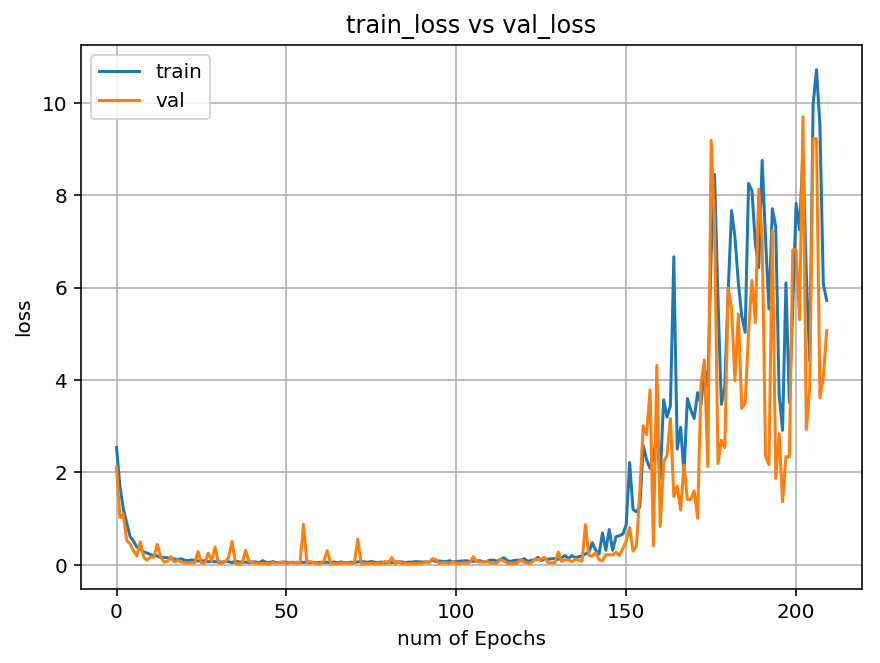

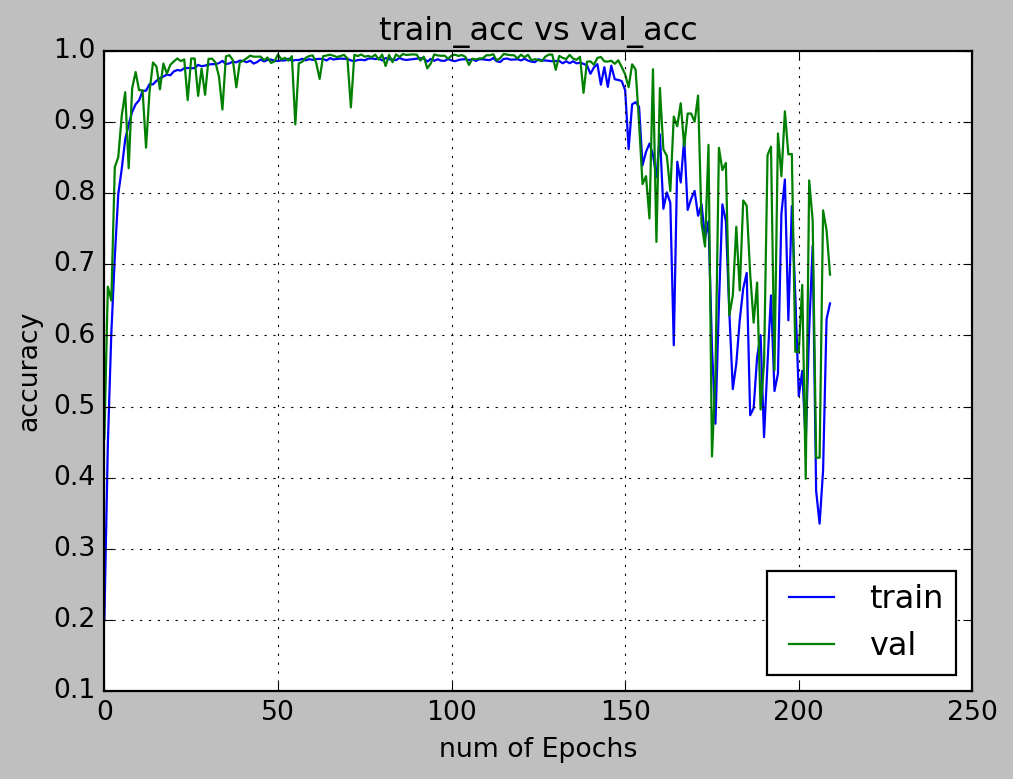

In [11]:
num_epoch = 210
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
plt.savefig('dropall1.jpeg')

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
plt.savefig('dropall2.jpeg')

## Model Evaluation
Our objective is to predict class of image from google images, thus load in the google images for evaluation and use our model to do prectiction of class.  

We chose epoch 192 weights as its the best balance between loss and accuracy (not too much overfitting).

In [3]:
# Loading model weights for best epoch , epoch = 36

#### LOAD MODEL THEN EVALUATE

from keras.models import load_model
loaded_model = load_model('./Weights drop extra/Best-weights-my_model-036-0.0838-0.9815.hdf5')

In [4]:
# loading in google images for evaluation

with open('X_test', 'rb') as file:
    X_goog = pickle.load(file)
    
with open('y_test', 'rb') as file:
    y_goog = pickle.load(file)
    
Y_goog = np_utils.to_categorical(y_goog, num_classes=17)
del y_goog

In [31]:
# Evaluating the model

score = loaded_model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.0311320434777
Test accuracy: 0.993638676845


In [5]:
# Evaluating the model

score = loaded_model.evaluate(X_goog, Y_goog, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 11.6327242624
Test accuracy: 0.214285714995


In [33]:
test_image = X_goog[55:56]
print (test_image.shape)

print(loaded_model.predict(test_image))
print(loaded_model.predict_classes(test_image))
print(Y_goog[55:56])

(1, 128, 128, 3)
[[  7.07963762e-25   1.22613013e-23   1.28087523e-11   2.65117538e-25
    1.28524820e-15   6.45168437e-20   3.22915257e-05   1.15314463e-22
    3.21261240e-10   4.87621282e-13   8.21023602e-25   9.99967694e-01
    2.59368519e-18   7.71639835e-24   1.19169067e-19   2.45650432e-18
    9.95940492e-15]]
[11]
[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [6]:
# Printing the confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = loaded_model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
#y_pred = model.predict_classes(X_test)
#print(y_pred)
target_names = ['class ' + str(x) for x in range(17)]

print(classification_report(np.argmax(Y_test,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(Y_test,axis=1), y_pred))

NameError: name 'X_test' is not defined

In [7]:
# Printing the confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = loaded_model.predict(X_goog)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
#y_pred = model.predict_classes(X_test)
#print(y_pred)
target_names = ['class ' + str(x) for x in range(17)]

print(classification_report(np.argmax(Y_goog,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(Y_goog,axis=1), y_pred))

[[  2.63358196e-24   4.53384205e-38   2.41171159e-15 ...,   1.66796842e-26
    4.53454311e-19   1.80494231e-11]
 [  3.32427252e-10   1.07525631e-12   1.18502071e-02 ...,   1.63095646e-18
    6.05630259e-12   7.60317344e-05]
 [  1.62294095e-33   0.00000000e+00   5.05903960e-17 ...,   0.00000000e+00
    5.30197969e-28   7.19177506e-16]
 ..., 
 [  1.19974939e-22   2.00825205e-22   2.02973729e-06 ...,   1.74527362e-28
    2.21886750e-28   1.46755896e-16]
 [  2.25513185e-27   2.90478741e-18   1.28592700e-01 ...,   1.89002625e-29
    8.97810088e-28   3.81716622e-17]
 [  0.00000000e+00   1.65417353e-26   2.39487085e-03 ...,   0.00000000e+00
    0.00000000e+00   1.64397997e-29]]
[ 6  6  6  6  9  9  6  9  9  6  6  6  6  6  6  6  6  6 16  6  6  9  9  6  6
  6  6  6  6  6  6  6  6  6  9  9  2  5  5  5  5  8  5  5  5  6  9  6  9  9
  6  9  9  9  6  9  6  6  6  9  9  9  9 16 16 16 16  6  9 16  9  6  6  9  6
  6  9  6  6  9  6  6  9  4]
             precision    recall  f1-score   support

    class

/home/Jeryl/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('conf_mat.jpeg')

In [22]:
# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(Y_goog,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

Confusion matrix, without normalization
[[0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 4 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 7 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 4 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 2]
 [0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]]


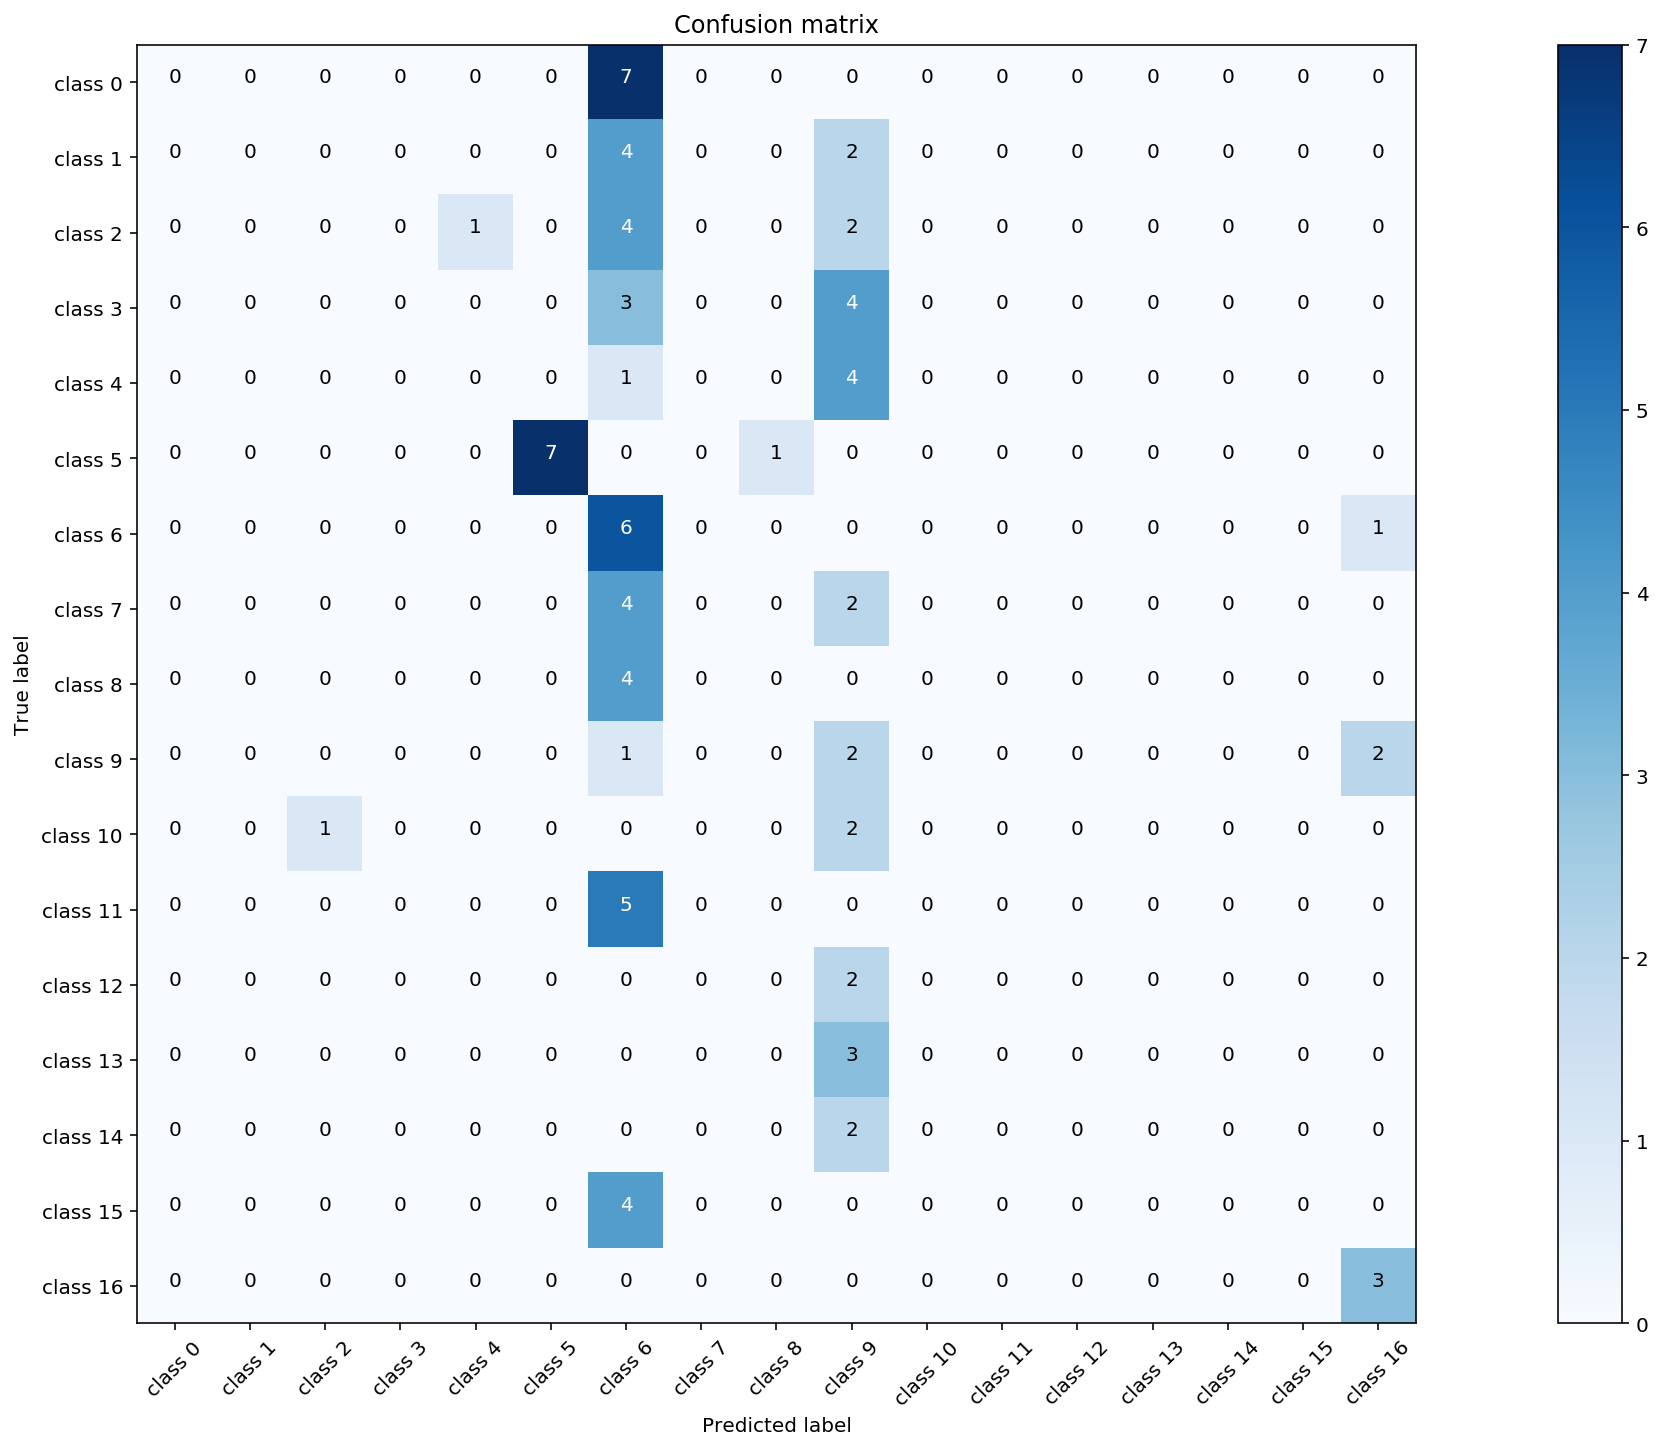

In [23]:
plt.figure(figsize=(20,10))
# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
plt.figure()

# # Plot normalized confusion matrix
# #plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
# #                      title='Normalized confusion matrix')
# #plt.figure()
# plt.show()

# #%%
# # Saving and loading model and weights
# from keras.models import model_from_json
# from keras.models import load_model

# # serialize model to JSON
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("model.h5")
# print("Saved model to disk")

# # load json and create model
# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("model.h5")
# print("Loaded model from disk")

# model.save('model.hdf5')
# loaded_model=load_model('model.hdf5')

In [ ]:
# # Testing a new image
# test_image = cv2.imread('data/Humans/rider-8.jpg')
# test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
# test_image=cv2.resize(test_image,(128,128))
# test_image = np.array(test_image)
# test_image = test_image.astype('float32')
# test_image /= 255
# print (test_image.shape)
   
# if num_channel==1:
# 	if K.image_dim_ordering()=='th':
# 		test_image= np.expand_dims(test_image, axis=0)
# 		test_image= np.expand_dims(test_image, axis=0)
# 		print (test_image.shape)
# 	else:
# 		test_image= np.expand_dims(test_image, axis=3) 
# 		test_image= np.expand_dims(test_image, axis=0)
# 		print (test_image.shape)
		
# else:
# 	if K.image_dim_ordering()=='th':
# 		test_image=np.rollaxis(test_image,2,0)
# 		test_image= np.expand_dims(test_image, axis=0)
# 		print (test_image.shape)
# 	else:
# 		test_image= np.expand_dims(test_image, axis=0)
# 		print (test_image.shape)
		
# # Predicting the test image
# print((model.predict(test_image)))
# print(model.predict_classes(test_image))

# #%%

# # Visualizing the intermediate layer

# #
# def get_featuremaps(model, layer_idx, X_batch):
# 	get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
# 	activations = get_activations([X_batch,0])
# 	return activations

# layer_num=3
# filter_num=0

# activations = get_featuremaps(model, int(layer_num),test_image)

# print (np.shape(activations))
# feature_maps = activations[0][0]      
# print (np.shape(feature_maps))

# if K.image_dim_ordering()=='th':
# 	feature_maps=np.rollaxis((np.rollaxis(feature_maps,2,0)),2,0)
# print (feature_maps.shape)

# fig=plt.figure(figsize=(16,16))
# plt.imshow(feature_maps[:,:,filter_num],cmap='gray')
# plt.savefig("featuremaps-layer-{}".format(layer_num) + "-filternum-{}".format(filter_num)+'.jpg')

# num_of_featuremaps=feature_maps.shape[2]
# fig=plt.figure(figsize=(16,16))	
# plt.title("featuremaps-layer-{}".format(layer_num))
# subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
# for i in range(int(num_of_featuremaps)):
# 	ax = fig.add_subplot(subplot_num, subplot_num, i+1)
# 	#ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
# 	ax.imshow(feature_maps[:,:,i],cmap='gray')
# 	plt.xticks([])
# 	plt.yticks([])
# 	plt.tight_layout()
# plt.show()
# fig.savefig("featuremaps-layer-{}".format(layer_num) + '.jpg')

# #%%